In [3]:
import pandas as pd

Highway_tracking = pd.read_csv("01_tracks.csv")

In [4]:
print(Highway_tracking.head())

   frame  id       x      y  width  height  xVelocity  yVelocity  \
0      1   1  362.26  21.68   4.85    2.12      40.85       0.00   
1      2   1  363.73  21.68   4.85    2.12      40.87       0.00   
2      3   1  365.27  21.68   4.85    2.12      40.88       0.00   
3      4   1  366.83  21.68   4.85    2.12      40.89       0.00   
4      5   1  368.42  21.68   4.85    2.12      40.90       0.01   

   xAcceleration  yAcceleration  ...  precedingXVelocity  precedingId  \
0           0.30            0.0  ...                 0.0            0   
1           0.30            0.0  ...                 0.0            0   
2           0.31            0.0  ...                 0.0            0   
3           0.32            0.0  ...                 0.0            0   
4           0.32            0.0  ...                 0.0            0   

   followingId  leftPrecedingId  leftAlongsideId  leftFollowingId  \
0            3                0                0                0   
1           14

In [5]:
print(Highway_tracking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348750 entries, 0 to 348749
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   frame               348750 non-null  int64  
 1   id                  348750 non-null  int64  
 2   x                   348750 non-null  float64
 3   y                   348750 non-null  float64
 4   width               348750 non-null  float64
 5   height              348750 non-null  float64
 6   xVelocity           348750 non-null  float64
 7   yVelocity           348750 non-null  float64
 8   xAcceleration       348750 non-null  float64
 9   yAcceleration       348750 non-null  float64
 10  frontSightDistance  348750 non-null  float64
 11  backSightDistance   348750 non-null  float64
 12  dhw                 348750 non-null  float64
 13  thw                 348750 non-null  float64
 14  ttc                 348750 non-null  float64
 15  precedingXVelocity  348750 non-nul

In [6]:
Highway_tracking['leftAlongsideId'].unique() #checking where it contains all o or any other values

array([   0,    3,    4,    5,    7,   11,   17,   23,   28,   29,   30,
         36,   40,   41,   46,   48,   49,   51,   54,   57,   58,   55,
         59,   63,   61,   65,   67,   68,   69,   70,   77,   74,   76,
         80,   79,   82,   84,   88,   90,   96,   95,   99,  100,  101,
        104,  107,  110,  113,  111,  114,  115,  118,  122,  127,  126,
        130,  131,  134,  133,  135,  136,  137,  139,  143,  145,  148,
        147,  149,  151,  155,  152,  153,  156,  157,  158,  160,  162,
        165,  168,  171,  174,  167,  169,  172,  175,  177,  180,  178,
        181,  183,  185,  188,  191,  195,  197,  199,  193,  194,  200,
        202,  203,  206,  208,  212,  209,  211,  214,  216,  218,  219,
        220,  221,  224,  226,  232,  233,  234,  235,  238,  240,  242,
        248,  247,  252,  253,  255,  256,  258,  260,  266,  262,  269,
        274,  275,  282,  278,  279,  281,  284,  285,  286,  289,  291,
        293,  287,  292,  296,  297,  299,  303,  3

In [7]:
# Get columns with only one unique value
one_value_cols = [col for col in Highway_tracking.columns if Highway_tracking[col].nunique() == 1]
print("Columns with only one value:", one_value_cols)

# Drop them
Highway_tracking = Highway_tracking.drop(columns=one_value_cols)


Columns with only one value: []


In [8]:
zero_dominant = [col for col in Highway_tracking.columns 
                 if (Highway_tracking[col] == 0).sum() / len(Highway_tracking) > 0.95]

print("Mostly zro columns:", zero_dominant)

# Drop them
Highway_tracking = Highway_tracking.drop(columns=zero_dominant)


Mostly zro columns: []


In [9]:
null_ratio = Highway_tracking.isnull().mean()
high_null_cols = null_ratio[null_ratio > 0.5].index.tolist()

print("Columns with too many nulls:", high_null_cols)

# Drop them
Highway_tracking = Highway_tracking.drop(columns=high_null_cols)


Columns with too many nulls: []


In [10]:
print("Final columns:", Highway_tracking.columns)
Highway_tracking.head()


Final columns: Index(['frame', 'id', 'x', 'y', 'width', 'height', 'xVelocity', 'yVelocity',
       'xAcceleration', 'yAcceleration', 'frontSightDistance',
       'backSightDistance', 'dhw', 'thw', 'ttc', 'precedingXVelocity',
       'precedingId', 'followingId', 'leftPrecedingId', 'leftAlongsideId',
       'leftFollowingId', 'rightPrecedingId', 'rightAlongsideId',
       'rightFollowingId', 'laneId'],
      dtype='object')


,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,1,1,362.26,21.68,4.85,2.12,40.85,0.00,0.30,0.0,...,0.0,0,3,0,0,0,0,0,6,5
1,2,1,363.73,21.68,4.85,2.12,40.87,0.00,0.30,0.0,...,0.0,0,14,0,0,0,0,0,6,5
2,3,1,365.27,21.68,4.85,2.12,40.88,0.00,0.31,0.0,...,0.0,0,14,0,0,0,0,0,6,5
3,4,1,366.83,21.68,4.85,2.12,40.89,0.00,0.32,0.0,...,0.0,0,14,0,0,0,0,0,6,5
4,5,1,368.42,21.68,4.85,2.12,40.90,0.01,0.32,0.0,...,0.0,0,14,0,0,0,0,0,6,5


In [11]:
Highway_tracking['risk_flag'] = Highway_tracking.apply(
    lambda row: 1 if (row['ttc'] < 2 or row['thw'] < 1) else 0, axis=1
)


In [12]:
Highway_tracking['risk_flag'] = Highway_tracking.apply(
    lambda row: 1 if (row['ttc'] < 2 or row['thw'] < 1) else 0, axis=1
)


In [14]:
Highway_tracking[['ttc', 'thw', 'risk_flag']].head(10)


,ttc,thw,risk_flag
0,0.0,0.0,1
1,0.0,0.0,1
2,0.0,0.0,1
3,0.0,0.0,1
4,0.0,0.0,1
5,0.0,0.0,1
6,0.0,0.0,1
7,0.0,0.0,1
8,0.0,0.0,1
9,0.0,0.0,1


In [15]:
print("Unique TTC values:", Highway_tracking['ttc'].unique())
print("Unique THW values:", Highway_tracking['thw'].unique())


Unique TTC values: [  0.   -17.38 -17.36 ... 126.32  75.6   92.91]
Unique THW values: [0.   3.51 3.52 ... 0.16 0.15 0.14]


In [16]:
Highway_tracking[['ttc', 'thw']].describe()


,ttc,thw
count,3.487500e+05,348750.000000
mean,-3.621779e+02,1.721476
std,2.132446e+05,1.961441
min,-1.256361e+08,0.000000
25%,-2.868000e+01,0.300000
50%,0.000000e+00,1.130000
75%,2.520000e+01,2.340000
max,6.195520e+06,13.820000


In [17]:
Highway_tracking = Highway_tracking[Highway_tracking['ttc'] >= 0]


In [18]:
Highway_tracking['risk_flag'] = Highway_tracking.apply(
    lambda row: 1 if (row['ttc'] < 2 or row['thw'] < 1) else 0, axis=1
)


In [19]:
# Show the first 10 rows to confirm changes
Highway_tracking[['ttc', 'thw', 'risk_flag']].head(10)


,ttc,thw,risk_flag
0,0.0,0.0,1
1,0.0,0.0,1
2,0.0,0.0,1
3,0.0,0.0,1
4,0.0,0.0,1
5,0.0,0.0,1
6,0.0,0.0,1
7,0.0,0.0,1
8,0.0,0.0,1
9,0.0,0.0,1


In [20]:
Highway_tracking['risk_flag'].value_counts()


risk_flag
1    123633
0     91698
Name: count, dtype: int64

In [21]:
Highway_tracking[['ttc', 'thw']].describe()

,ttc,thw
count,2.153310e+05,215331.000000
mean,2.213917e+02,1.307979
std,1.629499e+04,1.790261
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,1.537000e+01,0.780000
75%,5.429000e+01,1.840000
max,6.195520e+06,13.160000


In [22]:
Highway_tracking['is_boxed_in'] = Highway_tracking.apply(
    lambda row: 1 if all([
        row['leftPrecedingId'] != 0,
        row['rightPrecedingId'] != 0,
        row['leftFollowingId'] != 0,
        row['rightFollowingId'] != 0
    ]) else 0,
    axis=1
)


In [23]:
# Show a few rows
Highway_tracking[['leftPrecedingId', 'rightPrecedingId', 'leftFollowingId', 'rightFollowingId', 'is_boxed_in']].head(10)


,leftPrecedingId,rightPrecedingId,leftFollowingId,rightFollowingId,is_boxed_in
0,0,0,0,6,0
1,0,0,0,6,0
2,0,0,0,6,0
3,0,0,0,6,0
4,0,0,0,6,0
5,0,0,0,6,0
6,0,0,0,6,0
7,0,0,0,6,0
8,0,0,0,6,0
9,0,0,0,6,0


In [24]:
Highway_tracking['is_boxed_in'].value_counts()

is_boxed_in
0    215331
Name: count, dtype: int64

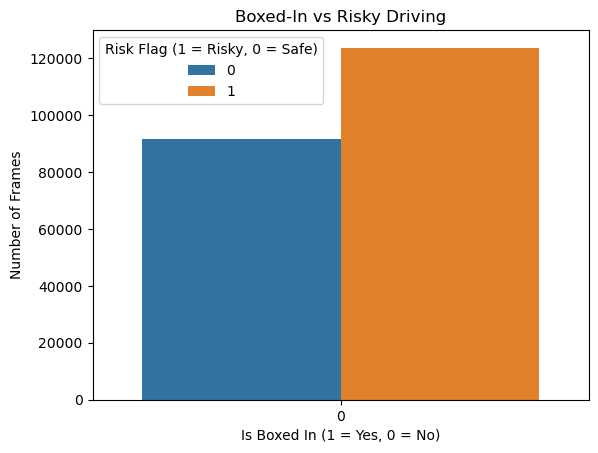

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=Highway_tracking, x='is_boxed_in', hue='risk_flag')
plt.title("Boxed-In vs Risky Driving")
plt.xlabel("Is Boxed In (1 = Yes, 0 = No)")
plt.ylabel("Number of Frames")
plt.legend(title="Risk Flag (1 = Risky, 0 = Safe)")
plt.show()


In [26]:
Highway_tracking['is_boxed_in'].value_counts()


is_boxed_in
0    215331
Name: count, dtype: int64

In [27]:
print(Highway_tracking.columns.tolist())

['frame', 'id', 'x', 'y', 'width', 'height', 'xVelocity', 'yVelocity', 'xAcceleration', 'yAcceleration', 'frontSightDistance', 'backSightDistance', 'dhw', 'thw', 'ttc', 'precedingXVelocity', 'precedingId', 'followingId', 'leftPrecedingId', 'leftAlongsideId', 'leftFollowingId', 'rightPrecedingId', 'rightAlongsideId', 'rightFollowingId', 'laneId', 'risk_flag', 'is_boxed_in']


In [28]:
Highway_tracking.groupby('is_boxed_in')['risk_flag'].value_counts()


is_boxed_in  risk_flag
0            1            123633
             0             91698
Name: count, dtype: int64

In [29]:
Highway_tracking['speed_change'] = abs(Highway_tracking['xAcceleration']) + abs(Highway_tracking['yAcceleration'])


In [30]:
Highway_tracking[['xAcceleration', 'yAcceleration', 'speed_change']].head(10)


,xAcceleration,yAcceleration,speed_change
0,0.30,0.0,0.30
1,0.30,0.0,0.30
2,0.31,0.0,0.31
3,0.32,0.0,0.32
4,0.32,0.0,0.32
5,0.33,0.0,0.33
6,0.33,0.0,0.33
7,0.34,0.0,0.34
8,0.34,0.0,0.34
9,0.34,0.0,0.34


In [31]:
Highway_tracking['sudden_behavior'] = Highway_tracking['speed_change'].apply(lambda x: 1 if x > 1.0 else 0)


In [32]:
Highway_tracking['sudden_behavior'].value_counts()


sudden_behavior
0    210795
1      4536
Name: count, dtype: int64

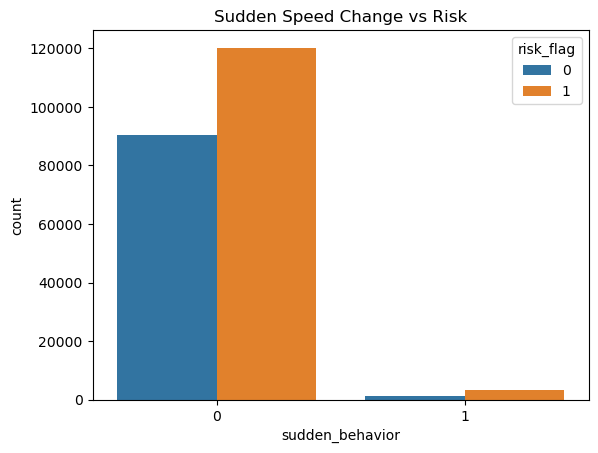

In [33]:
sns.countplot(data=Highway_tracking, x='sudden_behavior', hue='risk_flag')
plt.title("Sudden Speed Change vs Risk")
plt.show()


In [34]:
# Risk flags based on TTC (Time-to-Collision) and THW (Time Headway)
Highway_tracking['risk_flag'] = Highway_tracking.apply(lambda row: 1 if (row['ttc'] < 2 or row['thw'] < 1) else 0, axis=1)

# Speed variation indicator
Highway_tracking['speed_change'] = abs(Highway_tracking['xAcceleration']) + abs(Highway_tracking['yAcceleration'])

# Boxed-in indicator
Highway_tracking['is_boxed_in'] = Highway_tracking.apply(lambda row: 1 if all([row['leftPrecedingId'], row['rightPrecedingId'], row['leftFollowingId'], row['rightFollowingId']]) else 0, axis=1)


In [35]:
vehicle_data = Highway_tracking.groupby('id').agg({
    'risk_flag': 'sum',
    'xVelocity': 'mean',
    'thw': 'mean',
    'ttc': 'mean',
    'is_boxed_in': 'mean'
}).reset_index()


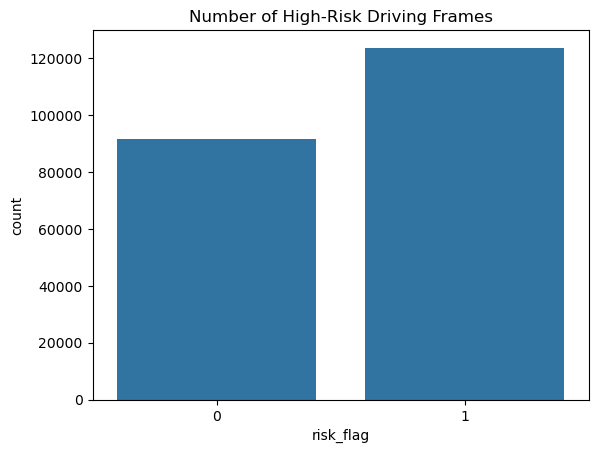

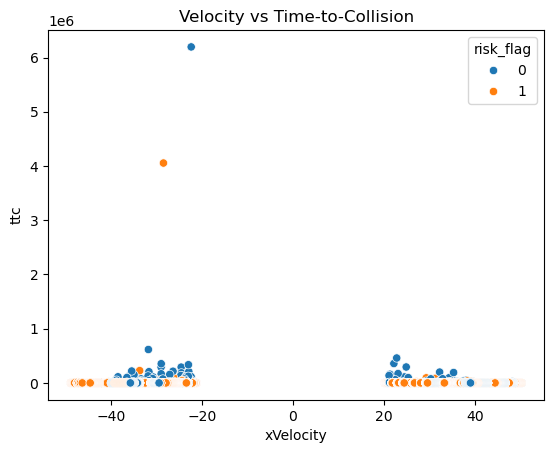

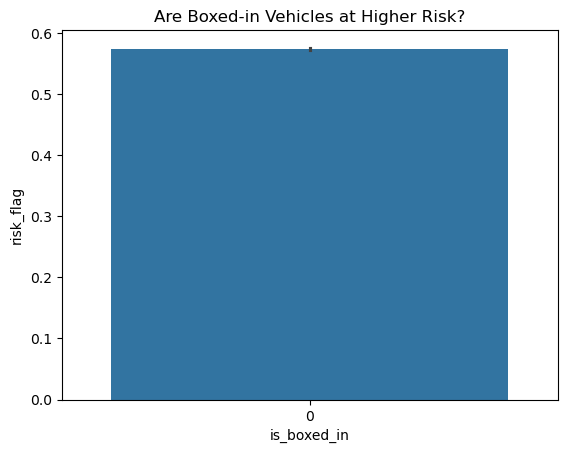

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Risk count
sns.countplot(data=Highway_tracking, x='risk_flag')
plt.title("Number of High-Risk Driving Frames")
plt.show()

# Relationship between TTC and X Velocity
sns.scatterplot(data=Highway_tracking, x='xVelocity', y='ttc', hue='risk_flag')
plt.title("Velocity vs Time-to-Collision")
plt.show()

# Boxed-in vs Risk
sns.barplot(data=Highway_tracking, x='is_boxed_in', y='risk_flag')
plt.title("Are Boxed-in Vehicles at Higher Risk?")
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = ['xVelocity', 'yVelocity', 'xAcceleration', 'ttc', 'thw', 'is_boxed_in']
X = Highway_tracking[features]
y = Highway_tracking['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


1.0


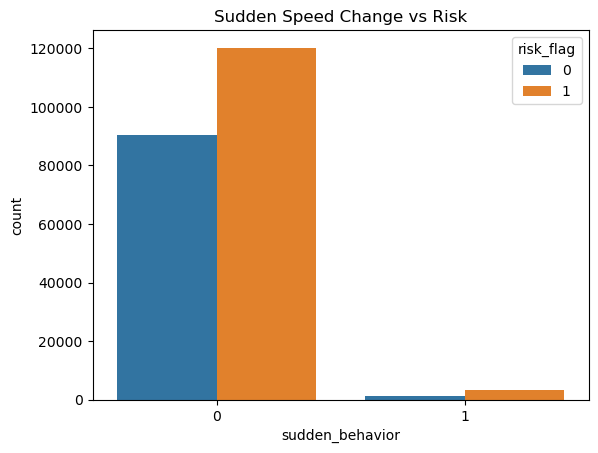

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data= Highway_tracking, x='sudden_behavior', hue='risk_flag')
plt.title("Sudden Speed Change vs Risk")
plt.show()


In [46]:
summary = Highway_tracking.groupby('id')[['risk_flag', 'speed_change', 'is_boxed_in']].mean()
print(summary.head())


    risk_flag  speed_change  is_boxed_in
id                                      
1         1.0      0.349697          0.0
2         1.0      0.189804          0.0
3         1.0      0.241351          0.0
4         1.0      0.153230          0.0
5         1.0      0.250061          0.0


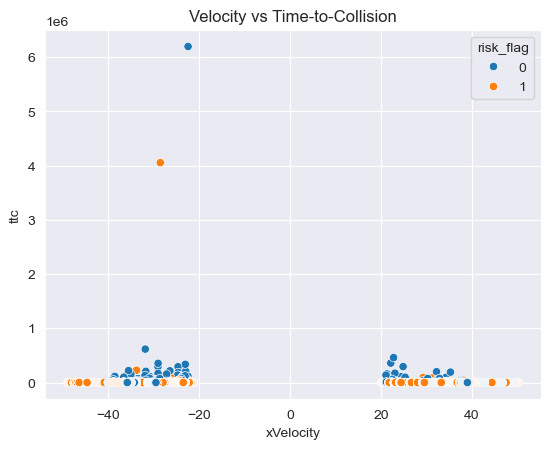

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

sns.scatterplot(data=Highway_tracking, x='xVelocity', y='ttc', hue='risk_flag')
plt.title("Velocity vs Time-to-Collision")
plt.show()


is_boxed_in_alt
0    215331
Name: count, dtype: int64


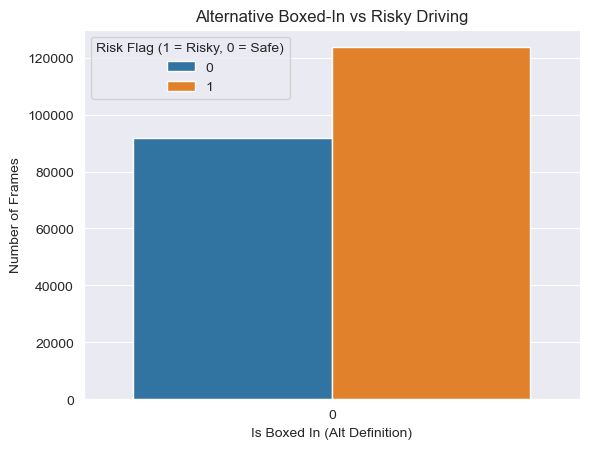

In [50]:
# Less strict version - vehicle has at least 3 neighbors
Highway_tracking['is_boxed_in_alt'] = Highway_tracking.apply(
    lambda row: 1 if sum([
        row['leftPrecedingId'] != 0,
        row['rightPrecedingId'] != 0,
        row['leftFollowingId'] != 0,
        row['rightFollowingId'] != 0
    ]) >= 3 else 0,
    axis=1
)

# Check distribution of new feature
print(Highway_tracking['is_boxed_in_alt'].value_counts())

# Visualize
sns.countplot(data=Highway_tracking, x='is_boxed_in_alt', hue='risk_flag')
plt.title("Alternative Boxed-In vs Risky Driving")
plt.xlabel("Is Boxed In (Alt Definition)")
plt.ylabel("Number of Frames")
plt.legend(title="Risk Flag (1 = Risky, 0 = Safe)")
plt.show()

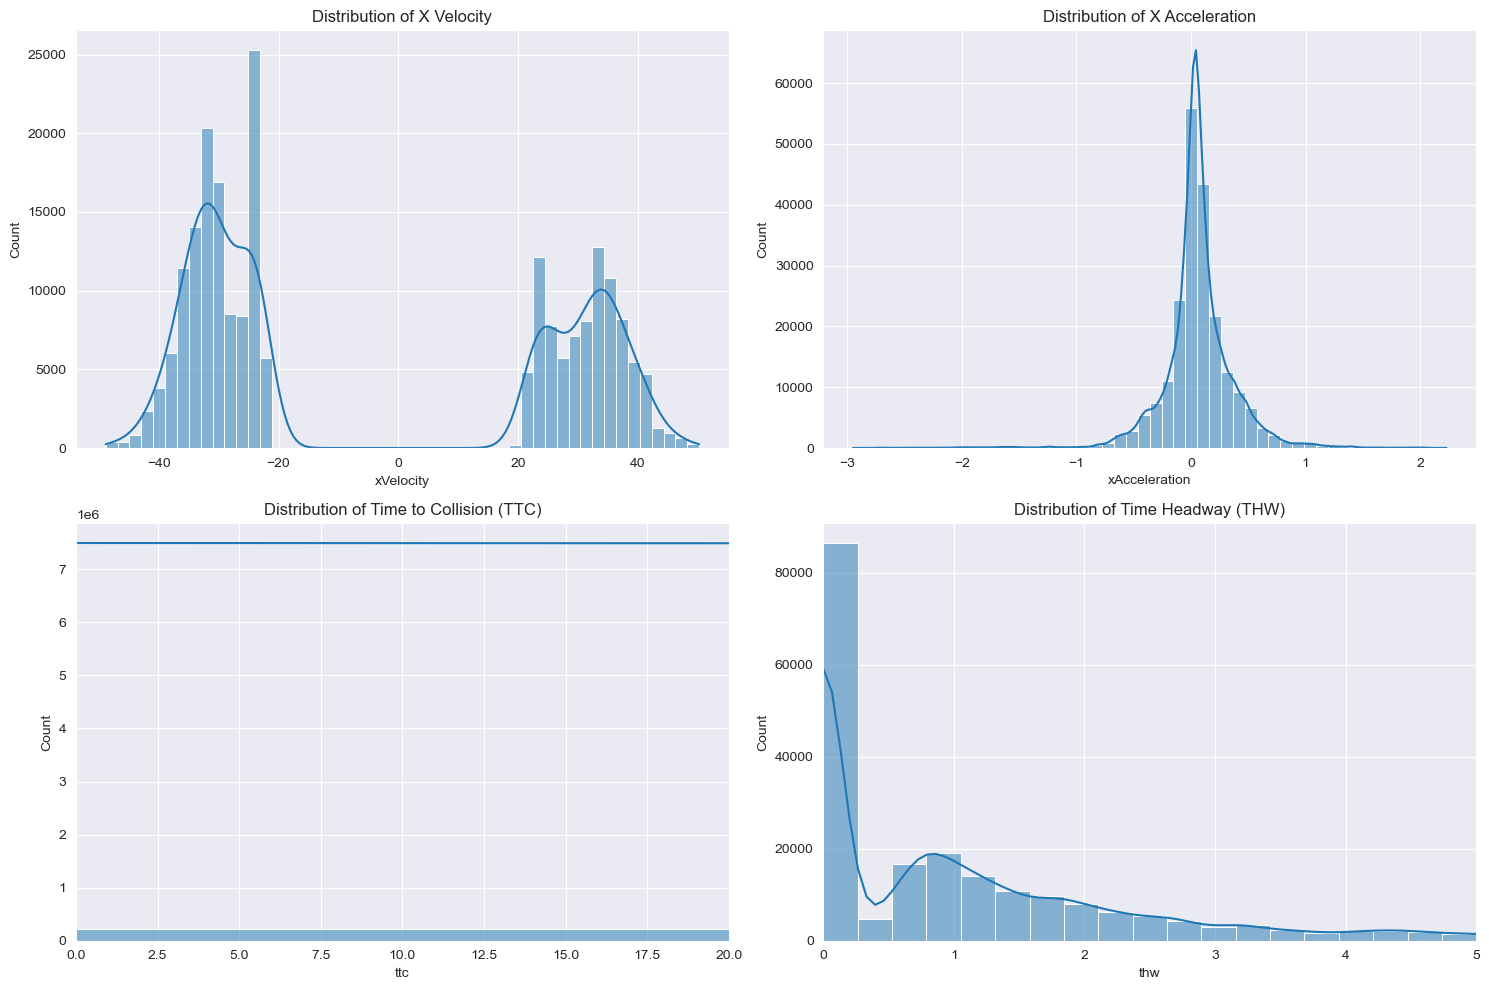

In [51]:
# Set up figure
plt.figure(figsize=(15, 10))

# Velocity distribution
plt.subplot(2, 2, 1)
sns.histplot(Highway_tracking['xVelocity'], bins=50, kde=True)
plt.title('Distribution of X Velocity')

# Acceleration distribution
plt.subplot(2, 2, 2)
sns.histplot(Highway_tracking['xAcceleration'], bins=50, kde=True)
plt.title('Distribution of X Acceleration')

# TTC distribution
plt.subplot(2, 2, 3)
sns.histplot(Highway_tracking['ttc'], bins=50, kde=True)
plt.title('Distribution of Time to Collision (TTC)')
plt.xlim(0, 20)  # Limit x-axis to see distribution better

# THW distribution
plt.subplot(2, 2, 4)
sns.histplot(Highway_tracking['thw'], bins=50, kde=True)
plt.title('Distribution of Time Headway (THW)')
plt.xlim(0, 5)  # Limit x-axis

plt.tight_layout()
plt.show()

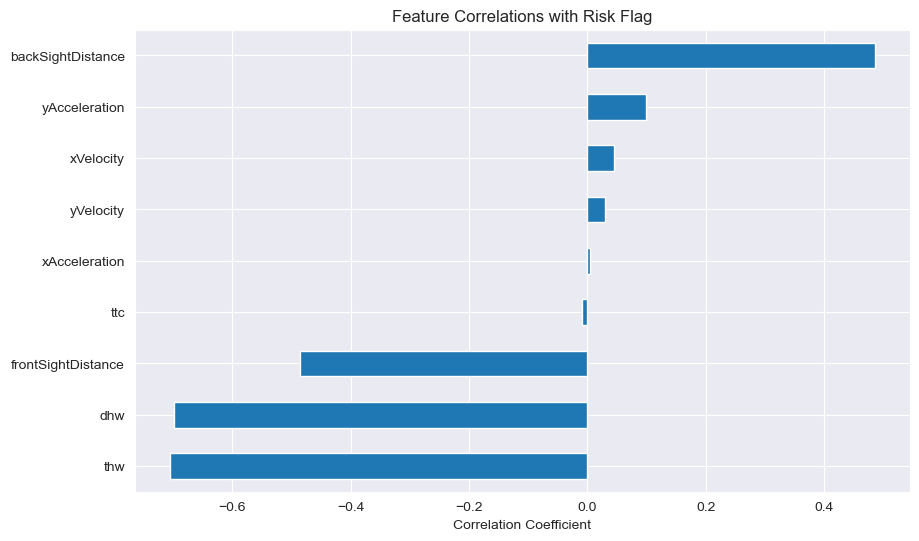

In [52]:
# Select numerical features
numeric_features = ['xVelocity', 'yVelocity', 'xAcceleration', 'yAcceleration', 
                   'frontSightDistance', 'backSightDistance', 'dhw', 'thw', 'ttc']

# Calculate correlation with risk_flag
correlations = Highway_tracking[numeric_features + ['risk_flag']].corr()['risk_flag'].drop('risk_flag')

# Plot
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh')
plt.title('Feature Correlations with Risk Flag')
plt.xlabel('Correlation Coefficient')
plt.show()

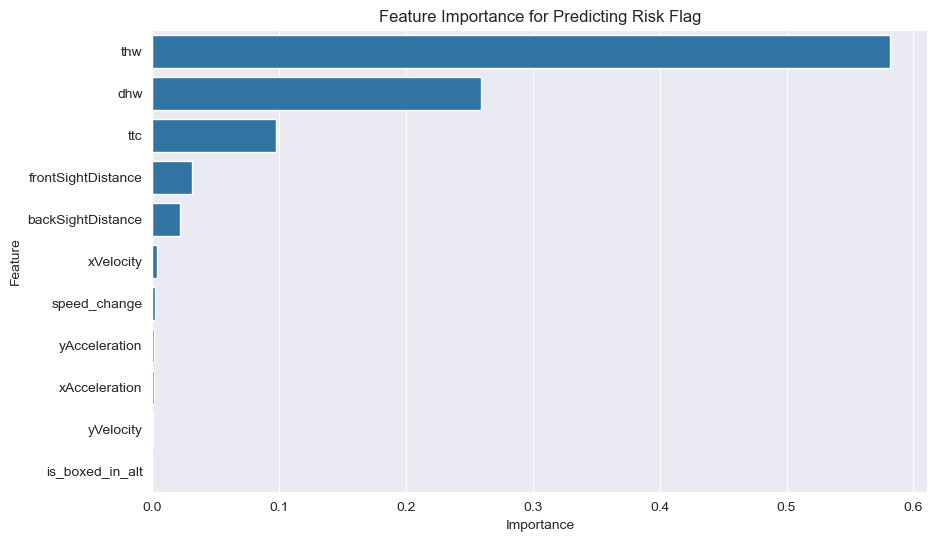

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare features and target
features = ['xVelocity', 'yVelocity', 'xAcceleration', 'yAcceleration',
           'frontSightDistance', 'backSightDistance', 'dhw', 'thw', 'ttc',
           'is_boxed_in_alt', 'speed_change']
X = Highway_tracking[features]
y = Highway_tracking['risk_flag']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Risk Flag')
plt.show()

Optimal threshold: 0.95
Precision at threshold: 1.00
Recall at threshold: 1.00


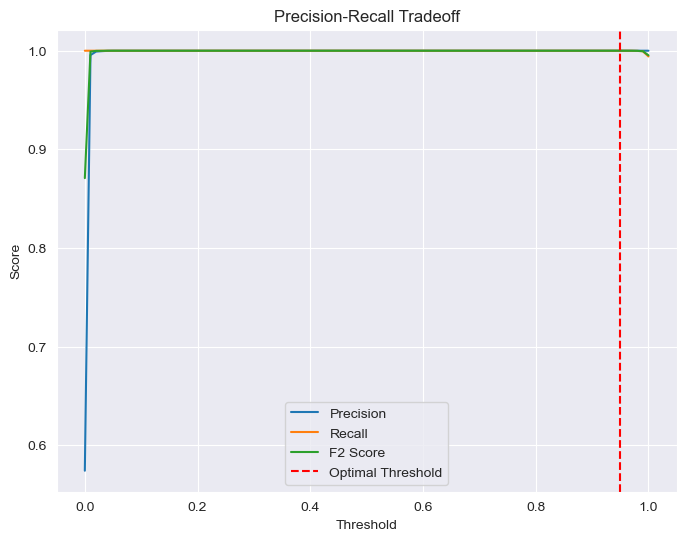

In [55]:
import numpy as np
from sklearn.metrics import precision_recall_curve, auc


# Get probabilities for risk_flag
y_probs = rf.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate F2 score (emphasizing recall)
f2_scores = (5 * precision * recall) / (4 * precision + recall)
optimal_idx = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.2f}")
print(f"Precision at threshold: {precision[optimal_idx]:.2f}")
print(f"Recall at threshold: {recall[optimal_idx]:.2f}")

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f2_scores[:-1], label='F2 Score')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label='Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.show()

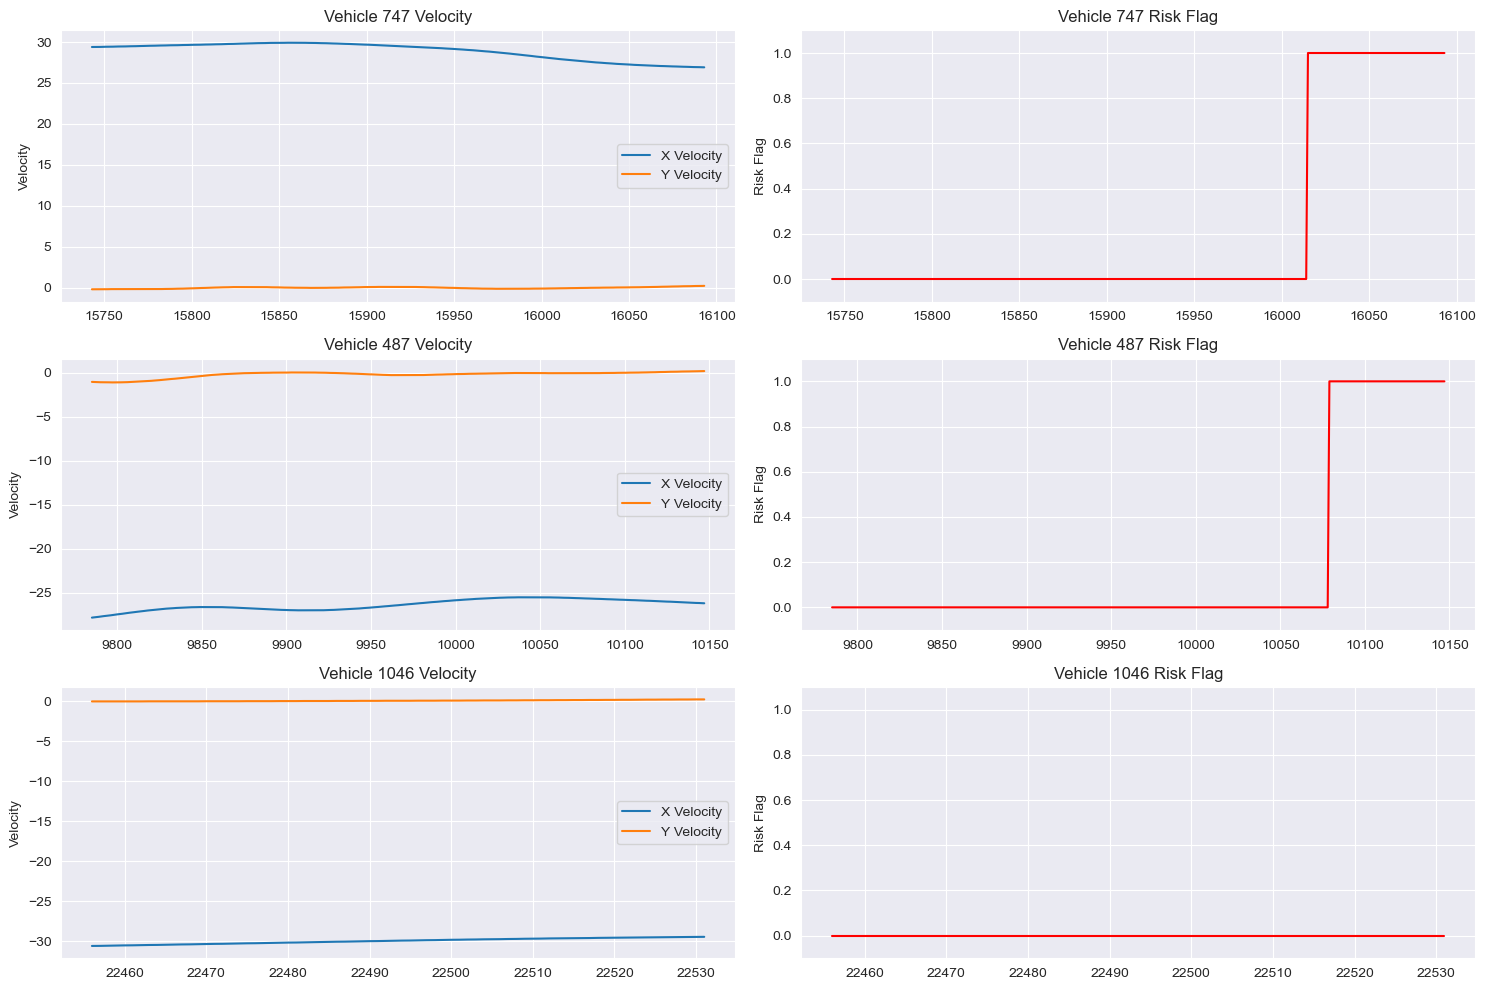

In [56]:
# Select a few vehicles to track
sample_ids = Highway_tracking['id'].sample(3).values

# Plot their metrics over time
plt.figure(figsize=(15, 10))

for i, vid in enumerate(sample_ids):
    vehicle_data = Highway_tracking[Highway_tracking['id'] == vid].sort_values('frame')
    
    plt.subplot(3, 2, i*2+1)
    plt.plot(vehicle_data['frame'], vehicle_data['xVelocity'])
    plt.plot(vehicle_data['frame'], vehicle_data['yVelocity'])
    plt.title(f'Vehicle {vid} Velocity')
    plt.ylabel('Velocity')
    plt.legend(['X Velocity', 'Y Velocity'])
    
    plt.subplot(3, 2, i*2+2)
    plt.plot(vehicle_data['frame'], vehicle_data['risk_flag'], 'r-')
    plt.title(f'Vehicle {vid} Risk Flag')
    plt.ylabel('Risk Flag')
    plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

In [59]:
# Calculate dynamic thresholds based on percentiles
ttc_threshold = np.percentile(Highway_tracking['ttc'], 10)  # 10th percentile
thw_threshold = np.percentile(Highway_tracking['thw'], 10)  # 10th percentile
accel_threshold = np.percentile(Highway_tracking['speed_change'], 90)  # 90th percentile

print(f"Dynamic thresholds - TTC: {ttc_threshold:.2f}, THW: {thw_threshold:.2f}, Acceleration: {accel_threshold:.2f}")

# Create enhanced risk flag
Highway_tracking['enhanced_risk_flag'] = Highway_tracking.apply(
    lambda row: 1 if (
        (row['ttc'] < ttc_threshold) or 
        (row['thw'] < thw_threshold) or 
        (row['speed_change'] > accel_threshold)
    )else 0,
    axis=1

)

# Compare with original risk flag
print("\nOriginal risk flag distribution:")
print(Highway_tracking['risk_flag'].value_counts())
print("\nEnhanced risk flag distribution:")
print(Highway_tracking['enhanced_risk_flag'].value_counts())

Dynamic thresholds - TTC: 0.00, THW: 0.00, Acceleration: 0.56

Original risk flag distribution:
risk_flag
1    123633
0     91698
Name: count, dtype: int64

Enhanced risk flag distribution:
enhanced_risk_flag
0    194217
1     21114
Name: count, dtype: int64
